# Introduction to Deep Learning

### by Andreas Damianou,  19 July 2017

### Data Science Africa 2017, Arusha, Tanzania


### First import necessary helper libraries for this tutorial and define helper functions

In [1]:
import numpy as np
from pylab import *
%matplotlib inline

In [2]:
# Define helper function for later

def plot_point(func, t, xmin, xmax):
    N = 10
    x = np.zeros((N,1))+t
    x = x[:,0]
    y = np.linspace(0,func(t),N)
    plt.plot(x,y, 'k--', linewidth=1)
    
    x = np.linspace(xmin, t, N)
    y = np.zeros((N,1))+func(t)
    plt.plot(x,y, 'k--', linewidth=1)

### Define the activation function and its derivative

In [3]:
# Sigmoid activation function
def activation(x):
    return 1/(1+np.exp(-x))

# Derivative of activation wrt input x
def activation_derivative(x):
    # the activation of the sigmoid function conveniently can be written in terms of its outputs.
    f = activation(x)
    return f*(1-f)

# Derivative of activation wrt input x but expressed when activation(x) is given as argument instead of x
def activation_derivative_f(f):
    return f*(1-f)


### Plots to explore the activation

First, plot the activation for input domain between -10 and 10

Text(0,0.5,'activation(x)')

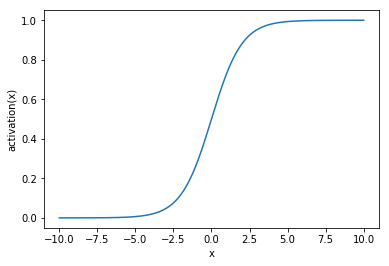

In [4]:
x1 = np.linspace(-10, 10, 500)
plt.plot(x1, activation(x1))
plt.xlabel('x'); plt.ylabel('activation(x)')

Let's see what happens with low, intermediate and high values:

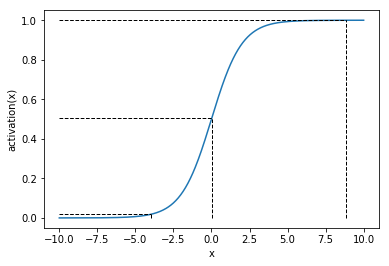

In [5]:
x1 = np.linspace(-10, 10, 500)
plt.plot(x1, activation(x1))
plt.xlabel('x'); plt.ylabel('activation(x)')
plot_point(activation, x1[150], -10, 10)
plot_point(activation, x1[250], -10, 10)
plot_point(activation, x1[470], -10, 10)

Repeat but for the space -20 to 20

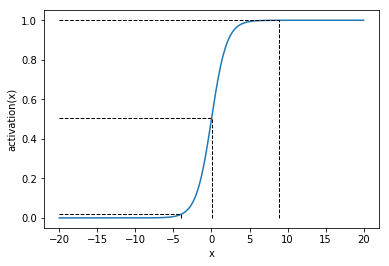

In [6]:
x2 = np.linspace(-20, 20, 500)
plt.plot(x2, activation(x2))
plt.xlabel('x'); plt.ylabel('activation(x)')
plot_point(activation, x1[150], -20, 20)
plot_point(activation, x1[250], -20, 20)
plot_point(activation, x1[470], -20, 20)

Explore the derivative

Text(0,0.5,'activation(x)')

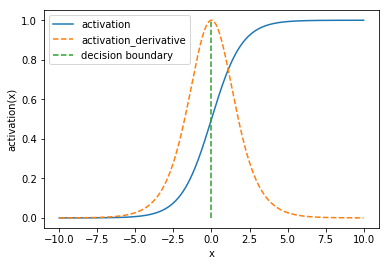

In [7]:
plt.plot(x1, activation(x1))
plt.plot(x1, 4*activation_derivative(x1), '--')
plt.plot(np.zeros((5,1)), np.linspace(0,1,5), '--')
plt.legend(['activation','activation_derivative','decision boundary'])
plt.xlabel('x')
plt.ylabel('activation(x)')

## Logistic regression

In [8]:
# Create some toy data
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Linear case
y = np.array([[0],
              [0],
              [1],
              [1]])

# Fix the seed
np.random.seed(1)

Text(0,0.5,'error in training data')

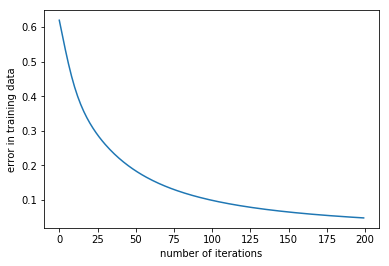

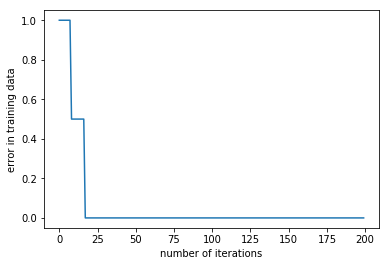

In [9]:
# Initialize weight
W0 = 2*np.random.random((3,1)) - 1
error = []
error_of_rounded = []
fs = []

# Optimize for 2000 iterations
for i in range(200):
    # FORWARD PASS: x -> f1 
    f0 = X
    f1 = activation(np.dot(f0, W0))
    loss = (0.5 * (y-f1)**2 ).sum()
    loss_of_rounded = (0.5 * (y-np.round(f1))**2 ).sum()
    
    # BACKWARDS PASS (derivatives of loss wrt W0)
    e1 = y - f1   # Error contribution
    delta_1 = e1 * activation_derivative_f(f1)  # The gradient contribution from activation
    gradient_1 = np.dot(f0.T,delta_1)
    
    learning_rate = 0.2
    
    # Update the weights. This is simply adding the gradient multiplied by a learning rate
    W0 += learning_rate * gradient_1

    # Keep track of error
    error.append(loss)
    error_of_rounded.append(loss_of_rounded)
    fs.append(f1)

plt.plot(error)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

plt.figure()
plt.plot(error_of_rounded)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

## Deep neural network

In [10]:

# Create some toy data
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# NON-linear case
y = np.array([[0],
               [1],
               [1],
               [0]])

In [11]:
# Fix the seed
np.random.seed(1)

Text(0,0.5,'error in training data')

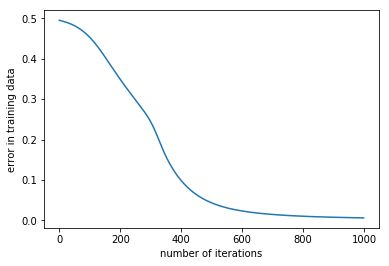

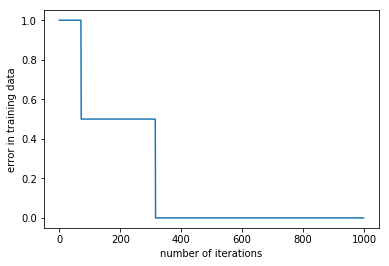

In [12]:
# randomly initialize our weights with mean 0
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1
error = []
error_of_rounded = []

# Optimize
for i in range(1000):
    # FORWARD PASS: x -> f1 -> f2
    f0 = X
    f1 = activation(np.dot(f0, W0))
    f2 = activation(np.dot(f1, W1))
    # Normally we'd use the cross-entropy loss, but here we'll use sq. error to make derivatives easier.
    loss = (0.5 * (y-f2)**2 ).sum()
    loss_of_rounded = (0.5 * (y-np.round(f2))**2 ).sum()
    
    # BACKWARDS PASS
    e2 = y - f2
    delta_2 = e2 * activation_derivative_f(f2)

    e1 = np.dot(delta_2, W1.T)
    delta_1 = e1 * activation_derivative_f(f1)

    gradient_0 = f0.T.dot(delta_1)
    gradient_1 = f1.T.dot(delta_2)
        
    # Update the weights
    learning_rate = 0.8
    W0 += learning_rate * gradient_0
    W1 += learning_rate * gradient_1

    # Keep track of error
    error.append(loss)
    error_of_rounded.append(loss_of_rounded)
    
plt.plot(error)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

plt.figure()
plt.plot(error_of_rounded)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

### Homework:
- Extend for arbitrary depth
- Add a bias in the activation
- Play with different parameterizations
- Put it on the side and re-implement it!
